In [4]:
import pandas as pd
import geopandas as gp 



In [5]:
data = gp.read_file("Mining_Tenements_DMIRS_003_WA_GDA2020_Public.geojson")

Skipping field granttime: unsupported OGR type: 10
Skipping field starttime: unsupported OGR type: 10
Skipping field endtime: unsupported OGR type: 10


In [6]:
data.head(
)

,gid,tenid,type,survstatus,tenstatus,holdercnt,holder1,addr1,holder2,addr2,...,addr9,fmt_tenid,legal_area,unit_of_me,special_in,extract_da,grantdate,startdate,enddate,geometry
0,32021428,CML1200448,COAL MINING LEASE,SURVEYED,LIVE,1.0,THE GRIFFIN COAL MINING COMPANY PTY LIMITED,"C/- TG MINING TITLE SERVICES PTY LTD,PO BOX Z5...",,,...,,CML 12/448,71.60,HA.,,2025-02-25 04:10:07+00:00,1952/02/28 00:00:01+00,1951-03-08 00:00:01+00:00,2025/06/30 00:00:00+00,"MULTIPOLYGON (((116.31024 -33.39057, 116.31176..."
1,32021429,CML1200449,COAL MINING LEASE,SURVEYED,LIVE,1.0,THE GRIFFIN COAL MINING COMPANY PTY LIMITED,"C/- TG MINING TITLE SERVICES PTY LTD,PO BOX Z5...",,,...,,CML 12/449,129.45,HA.,,2025-02-25 04:10:40+00:00,1951/06/28 00:00:01+00,1951-03-08 00:00:01+00:00,2025/06/30 00:00:00+00,"MULTIPOLYGON (((116.2999 -33.42261, 116.30594 ..."
2,32021430,CML1200450,COAL MINING LEASE,SURVEYED,LIVE,1.0,THE GRIFFIN COAL MINING COMPANY PTY LIMITED,"C/- TG MINING TITLE SERVICES PTY LTD,PO BOX Z5...",,,...,,CML 12/450,129.50,HA.,,2025-02-25 04:10:40+00:00,1951/06/28 00:00:01+00,1951-03-07 00:00:01+00:00,2025/06/30 00:00:00+00,"MULTIPOLYGON (((116.32327 -33.42598, 116.31637..."
3,32021431,CML1200451,COAL MINING LEASE,SURVEYED,LIVE,1.0,THE GRIFFIN COAL MINING COMPANY PTY LIMITED,"C/- TG MINING TITLE SERVICES PTY LTD,PO BOX Z5...",,,...,,CML 12/451,129.50,HA.,,2025-02-25 04:10:40+00:00,1951/06/28 00:00:01+00,1951-03-07 00:00:01+00:00,2025/06/30 00:00:00+00,"MULTIPOLYGON (((116.33018 -33.4216, 116.32842 ..."
4,32021432,CML1200452,COAL MINING LEASE,SURVEYED,LIVE,1.0,THE GRIFFIN COAL MINING COMPANY PTY LIMITED,"C/- TG MINING TITLE SERVICES PTY LTD,PO BOX Z5...",,,...,,CML 12/452,129.50,HA.,,2025-02-25 04:10:40+00:00,1951/06/28 00:00:01+00,1951-03-07 00:00:01+00:00,2025/06/30 00:00:00+00,"MULTIPOLYGON (((116.33708 -33.41723, 116.33182..."


In [7]:
data['type'].unique(
)

array(['COAL MINING LEASE', 'EXPLORATION LICENCE', 'PROSPECTING LICENCE',
       'MINING LEASE', 'GENERAL PURPOSE LEASE',
       'GENERAL PURPOSE LEASE S.A.', 'MISCELLANEOUS LICENCE',
       'CHRISTMAS ISLAND EXPLORATION LICENCE',
       'CHRISTMAS ISLAND GENERAL PURPOSE LEASE',
       'MISCELLANEOUS LICENSE S.A.', 'MINERAL LEASE',
       'MINERAL LEASE S.A.', 'CHRISTMAS ISLAND MISCELLANEOUS LICENCE',
       'LICENCE TO TREAT TAILINGS', 'MINING LEASE S.A.',
       'RETENTION LICENCE', 'MINERAL CLAIM',
       'CHRISTMAS ISLAND MINING LEASE', 'TEMPORARY RESERVE',
       'EXPLORATION LICENCE OFFSHORE', 'COMMONWEALTH EXPLORATION LICENCE'],
      dtype=object)

In [22]:
def make_file_by_input_type(theType, entrydf):
    df = entrydf[entrydf['type'] == theType]
    filename = theType.replace(" ", "_")
    df.to_file(f"{filename}.geojson", driver="GeoJSON")
    
    

In [24]:
make_file_by_input_type("EXPLORATION LICENCE", data)

In [9]:
len(data['holder1'].unique())

3557

In [13]:
coal = data[data['type'] == "COAL MINING LEASE"]

<Axes: >

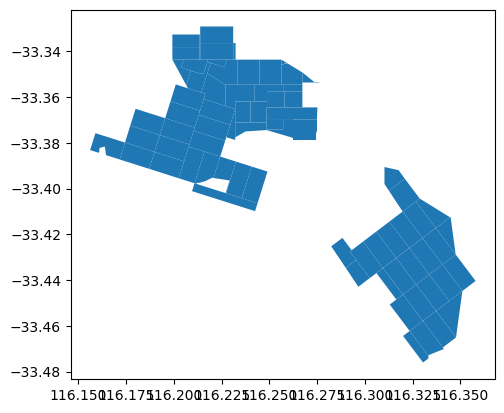

In [15]:
coal.plot()

In [18]:
coal.to_file("coal.geojson", driver="GeoJSON")